In [1]:
import numpy as np
import pandas as pd

from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from graphing_utils import *
from plots import *

In [2]:
def data_processing_func(data):
    cols = [*data.columns]
    group_cols = [x for x in cols if 'Selected Choice' in x]
    group_cols_main_ques = [x.split(' - Selected Choice')[0] for x in group_cols]
    group_cols_uniq_main_ques = np.unique(group_cols_main_ques)
    
    def group_cols_func(x):
        answer_list = []
        for col in x.keys():
            if(pd.isnull(x[col]) == False):
                answer_list.append(x[col])
        return ' | '.join(answer_list)

    grouped_cols_df = pd.DataFrame()
    for ques_idx, ques in enumerate(group_cols_uniq_main_ques):
        ques_group_cols = [x for x in group_cols if x.startswith(ques)]
        grouped_col_df = data[ques_group_cols].apply(group_cols_func, axis = 1)
        grouped_cols_df = pd.concat([grouped_cols_df, grouped_col_df], axis = 1)
    grouped_cols_df.columns = group_cols_uniq_main_ques
    
    data = data.drop(group_cols, axis = 1)
    data = pd.concat([data, grouped_cols_df], axis = 1)
    return data

In [3]:
raw_data = pd.read_csv('./Data/kaggle-survey-2021/kaggle_survey_2021_responses.csv', header = [0], skiprows = [0])
data = data_processing_func(raw_data)

/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (195,201) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data_questions = data.columns
data.columns = [f'Q_{x}' for x in range(data.shape[1])]

In [9]:
data[data['Q_25'] == 'Student']['Q_10'].unique()

array([nan], dtype=object)

In [5]:
data.head()

,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,...,Q_42,Q_43,Q_44,Q_45,Q_46,Q_47,Q_48,Q_49,Q_50,Q_51
0,910,50-54,India,Bachelor’s degree,5-10 years,2-5 times,5-10 years,50-249 employees,3-4,No (we do not use ML methods),...,None,,Google Cloud Platform (GCP),Colab Notebooks,Vim / Emacs,Scikit-learn | TensorFlow | Caret,"Word embeddings/vectors (GLoVe, fastText, word...",,Google Cloud TPUs,"Email newsletters (Data Elixir, O'Reilly Data ..."
1,784,50-54,Indonesia,Master’s degree,20+ years,Never,Under 1 year,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,...,,Google Cloud Platform (GCP) | Oracle Cloud,,Kaggle Notebooks | Colab Notebooks,Notepad++ | Jupyter Notebook,Scikit-learn,,Google Cloud AutoML,None,"Journal Publications (peer-reviewed journals, ..."
2,924,22-24,Pakistan,Master’s degree,1-3 years,Never,I do not use machine learning methods,"1000-9,999 employees",0,I do not know,...,None,Amazon Web Services (AWS) | Google Cloud Pl...,None,Kaggle Notebooks,PyCharm | Jupyter Notebook | Other,,,DataRobot AutoML,Other,"Kaggle (notebooks, forums, etc) | YouTube (Kag..."
3,575,45-49,Mexico,Doctoral degree,20+ years,More than 25 times,5-10 years,"1000-9,999 employees",0,I do not know,...,,Amazon Web Services (AWS) | Microsoft Azure,,Colab Notebooks,Spyder | Jupyter Notebook,Scikit-learn | TensorFlow | Keras,None,,NVIDIA GPUs,"YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,781,45-49,India,Doctoral degree,< 1 years,Never,10-20 years,50-249 employees,5-9,We use ML methods for generating insights (but...,...,Microsoft Power BI,,Microsoft Azure,Google Cloud Datalab,Spyder | MATLAB | Jupyter Notebook,Scikit-learn | PyTorch | LightGBM,,,None,"Journal Publications (peer-reviewed journals, ..."


# PPP-adjusted Salaries

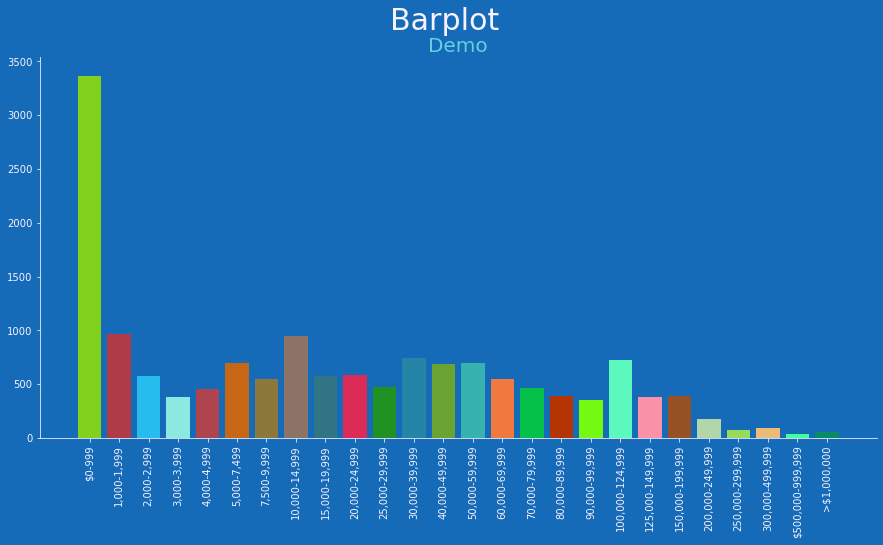

In [6]:
salary_order = [
    '$0-999',
    '1,000-1,999',
    '2,000-2,999',
    '3,000-3,999',
    '4,000-4,999',
    '5,000-7,499',
    '7,500-9,999',
    '10,000-14,999',
    '15,000-19,999',
    '20,000-24,999',
    '25,000-29,999',
    '30,000-39,999',
    '40,000-49,999',
    '50,000-59,999',
    '60,000-69,999',
    '70,000-79,999',
    '80,000-89,999',
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '250,000-299,999',
    '300,000-499,999',
    '$500,000-999,999',
    '>$1,000,000'
]
salaries = data['Q_10'].value_counts().loc[salary_order]
plot_barplot(salary_order, salaries.values, rotate_x = 90)

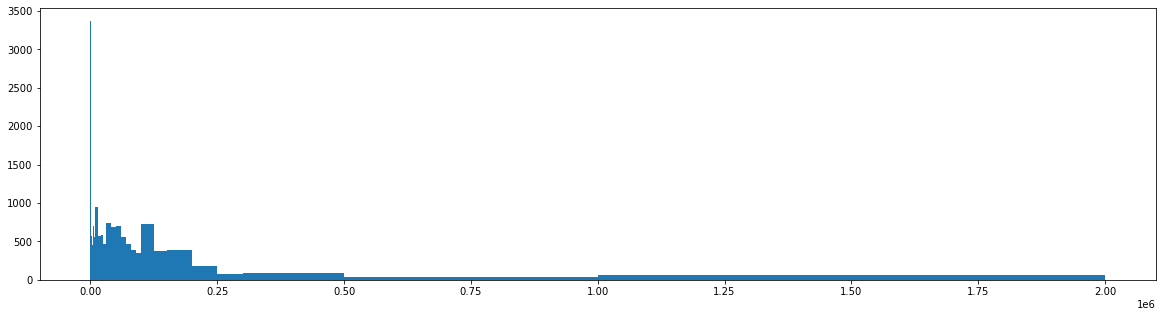

In [7]:
starting_points = [0   , 1000, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000, 200000, 250000, 300000, 500000, 1000000]
widths =          [1000, 1000, 1000, 1000, 1000, 2500, 2500,  5000,  5000,  5000,  5000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,  25000,  25000,  50000,  50000,  50000, 200000, 500000, 1000000]
ending_points = np.add(starting_points, widths)
mid_points = np.add(starting_points, np.divide(widths, 2))
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.bar(mid_points, salaries.values, width = widths)
plt.show()

In [9]:
# LINK: https://www.economist.com/big-mac-index
# GDP-adjusted
# Jul 2021
bigmac_idx = {
    "India": -18.4,
    "Indonesia": -26.8,
    "Pakistan": 16.5,
    "Mexico": -6.1,
    "Russia": -34.3,
    "Turkey": -31.1,
    "Australia": -8.1,
    "Nigeria": np.nan,
    "Greece": 9.2,
    "Belgium": 9.2,
    "Japan": -24.4,
    "Egypt": -14.9,
    "Singapore": -21.1,
    "Brazil": 31.5,
    "Poland": -6.7,
    "China": -0.4,
    "Iran, Islamic Republic of...": np.nan,
    "United States of America": 0,
    "Italy": 9.2,
    "Viet Nam": -5.8,
    "Israel": 6.7,
    "Peru": -0.7,
    "South Africa": -29.6,
    "Other": np.nan,
    "Spain": 9.2,
    "Bangladesh": np.nan,
    "United Kingdom of Great Britain and Northern Ireland": 1.0,
    "France": 9.2,
    "Switzerland": 6.5,
    "Algeria": np.nan,
    "Tunisia": np.nan,
    "Argentina": 16.3,
    "Sweden": 19.8,
    "Colombia": 3.5,
    "I do not wish to disclose my location": np.nan,
    "Canada": 10.2,
    "Chile": 10.2,
    "Netherlands": 9.2,
    "Ukraine": -25.1,
    "Saudi Arabia": -3.5,
    "Romania": -29.0,
    "Morocco": np.nan,
    "Austria": 9.2,
    "Taiwan": -38.9,
    "Kenya": np.nan,
    "Belarus": np.nan,
    "Ireland": 9.2,
    "Portugal": 9.2,
    "Hong Kong (S.A.R.)": -45.6,
    "Denmark": -14.2,
    "Germany": 9.2,
    "South Korea": -7.8,
    "Philippines": -11.2,
    "Sri Lanka": 10.0,
    "United Arab Emirates": -7.8,
    "Uganda": np.nan,
    "Ghana": np.nan,
    "Malaysia": -31.7,
    "Thailand": 17.0,
    "Nepal": np.nan,
    "Kazakhstan": np.nan,
    "Ethiopia": np.nan,
    "Iraq": np.nan,
    "Ecuador": np.nan,
    "Norway": 8.6,
    "Czech Republic": 2.9,
}

In [10]:
data2 = data.copy()
data2['PPP_adjusted'] = data2['Q_2'].map(bigmac_idx)
print(data2.shape)
data2 = data2.loc[~pd.isnull(data2['PPP_adjusted'])]
data2 = data2.loc[~pd.isnull(data2['Q_10'])]
print(data2.shape)

(25973, 53)
(13314, 53)


In [11]:
data2['min_sal'] = data2['Q_10'].apply(lambda x: starting_points[salary_order.index(x)]) / 1000
data2['mid_sal'] = data2['Q_10'].apply(lambda x: mid_points[salary_order.index(x)]) / 1000
data2['max_sal'] = data2['Q_10'].apply(lambda x: ending_points[salary_order.index(x)]) / 1000
data2['PPP_adj_min_sal'] = data2['min_sal'] * (1 + (data2['PPP_adjusted'] / 100.0))
data2['PPP_adj_mid_sal'] = data2['mid_sal'] * (1 + (data2['PPP_adjusted'] / 100.0))
data2['PPP_adj_max_sal'] = data2['max_sal'] * (1 + (data2['PPP_adjusted'] / 100.0))
#data2['PPP_adj_min_sal'] = data2['PPP_adj_min_sal'].astype(np.int32)
#data2['PPP_adj_max_sal'] = data2['PPP_adj_max_sal'].astype(np.int32)
data2[['min_sal', 'mid_sal', 'max_sal', 'PPP_adj_min_sal', 'PPP_adj_max_sal', 'PPP_adjusted', 'Q_10', 'Q_2']].head()

,min_sal,mid_sal,max_sal,PPP_adj_min_sal,PPP_adj_max_sal,PPP_adjusted,Q_10,Q_2
0,25.0,27.5,30.0,20.40,24.480,-18.4,"25,000-29,999",India
1,60.0,65.0,70.0,43.92,51.240,-26.8,"60,000-69,999",Indonesia
2,0.0,0.5,1.0,0.00,1.165,16.5,$0-999,Pakistan
3,30.0,35.0,40.0,28.17,37.560,-6.1,"30,000-39,999",Mexico
4,30.0,35.0,40.0,24.48,32.640,-18.4,"30,000-39,999",India


In [12]:
data2[['PPP_adj_min_sal', 'PPP_adj_max_sal']].to_csv('./Data/temp.csv', index = False)

In [1]:
sampled_gamma = np.random.gamma(0.361871056, 1 / 0.007627194, 100000) * 1000
fig, ax = plt.subplots(3, 1, figsize = (30, 25), sharex = True)
sns.distplot(sampled_gamma, ax = ax[0], label = 'Modelled')
sns.distplot(data2['mid_sal'] * 1000, ax = ax[0], label = 'actual mid')
sns.distplot(data2['PPP_adj_mid_sal'] * 1000, ax = ax[0], label = 'adjusted mid')
ax[0].legend(loc = 'best')
sns.kdeplot(sampled_gamma, ax = ax[1], label = 'Modelled')
sns.kdeplot(data2['mid_sal'] * 1000, ax = ax[1], label = 'actual mid')
sns.kdeplot(data2['PPP_adj_mid_sal'] * 1000, ax = ax[1], label = 'adjusted mid')
ax[1].legend(loc = 'best')
ax[2].bar(mid_points, salaries.values, width = widths)
plt.show()

NameError: name 'np' is not defined

# Profession

['Other', 'Program/Project Manager', 'Software Engineer', 'Research Scientist', 'Currently not employed', 'Student', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Business Analyst', 'Data Engineer', 'Product Manager', 'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer']


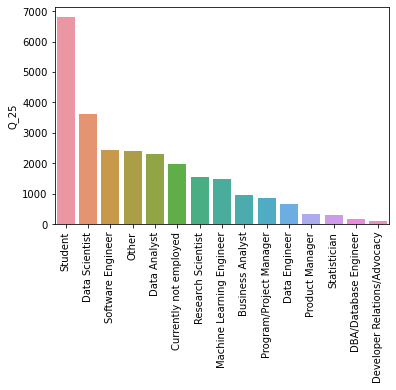

In [6]:
print([*data['Q_25'].unique()])
val_cnts = data['Q_25'].value_counts()
sns.barplot(x = val_cnts.index, y = val_cnts)
plt.xticks(rotation = 90)
plt.show()

['Manufacturing/Fabrication', 'Academics/Education', '', 'Computers/Technology', 'Other', 'Shipping/Transportation', 'Energy/Mining', 'Insurance/Risk Assessment', 'Non-profit/Service', 'Accounting/Finance', 'Hospitality/Entertainment/Sports', 'Government/Public Service', 'Online Service/Internet-based Services', 'Online Business/Internet-based Sales', 'Medical/Pharmaceutical', 'Retail/Sales', 'Broadcasting/Communications', 'Marketing/CRM', 'Military/Security/Defense']


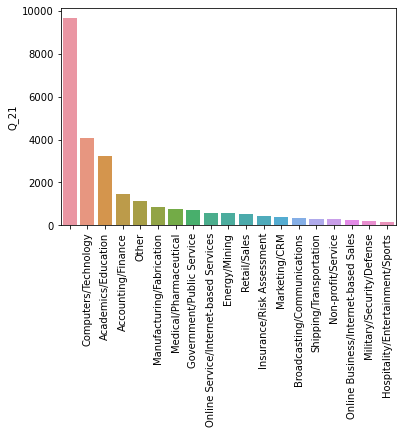

In [19]:
print([*data['Q_21'].unique()])
val_cnts = data['Q_21'].value_counts()
sns.barplot(x = val_cnts.index, y = val_cnts)
plt.xticks(rotation = 90)
plt.show()

# Specialized H/W

In [20]:
[*data['Q_50'].unique()]

[' Google Cloud TPUs ',
 'None',
 'Other',
 ' NVIDIA GPUs ',
 '',
 ' NVIDIA GPUs  |  Google Cloud TPUs ',
 ' AWS Trainium Chips ',
 ' NVIDIA GPUs  |  AWS Trainium Chips ',
 ' AWS Trainium Chips  |  AWS Inferentia Chips ',
 ' NVIDIA GPUs  |  Google Cloud TPUs  |  AWS Trainium Chips  |  AWS Inferentia Chips ',
 ' NVIDIA GPUs  | Other',
 ' NVIDIA GPUs  |  Google Cloud TPUs  |  AWS Trainium Chips ',
 ' Google Cloud TPUs  |  AWS Inferentia Chips ',
 ' Google Cloud TPUs  |  AWS Trainium Chips  |  AWS Inferentia Chips ',
 ' Google Cloud TPUs  |  AWS Trainium Chips ',
 ' NVIDIA GPUs  |  Google Cloud TPUs  |  AWS Inferentia Chips ',
 ' Google Cloud TPUs  | Other',
 ' NVIDIA GPUs  |  AWS Trainium Chips  |  AWS Inferentia Chips ',
 ' NVIDIA GPUs  |  AWS Inferentia Chips ',
 ' AWS Inferentia Chips ',
 ' NVIDIA GPUs  |  Google Cloud TPUs  | Other',
 ' NVIDIA GPUs  |  Google Cloud TPUs  |  AWS Trainium Chips  |  AWS Inferentia Chips  | Other',
 ' AWS Trainium Chips  | Other',
 ' AWS Inferentia Chips

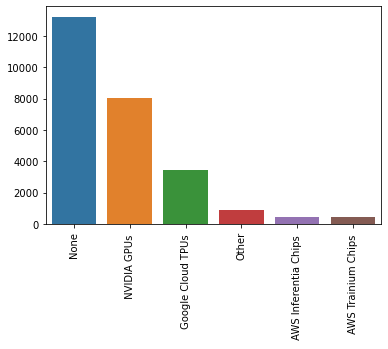

In [21]:
sel_cols = [x for x in raw_data.columns if 'Which types of specialized hardware do you use on a regular basis?' in x]
val_cnts = raw_data.shape[0] - pd.isnull(raw_data[sel_cols]).sum().sort_values()
sns.barplot(x = [x.split('Selected Choice - ')[-1] for x in val_cnts.index], y = val_cnts)
plt.xticks(rotation = 90)
plt.show()

# ML Models

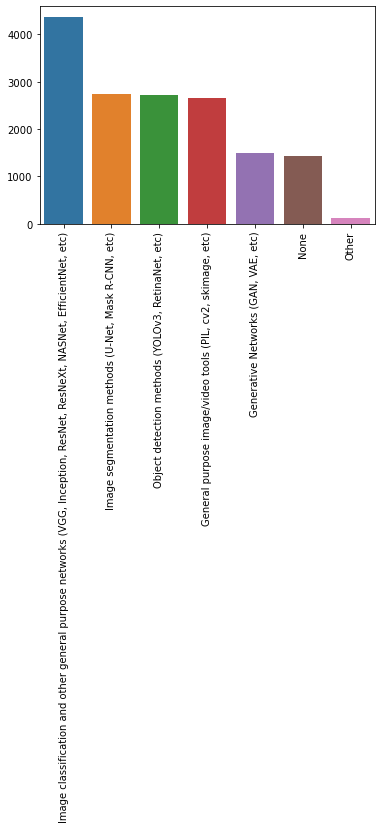

In [25]:
sel_cols = [x for x in raw_data.columns if 'Which categories of computer vision methods do you use on a regular basis?' in x]
val_cnts = raw_data.shape[0] - pd.isnull(raw_data[sel_cols]).sum().sort_values()
sns.barplot(x = [x.split('Selected Choice - ')[-1] for x in val_cnts.index], y = val_cnts)
plt.xticks(rotation = 90)
plt.show()

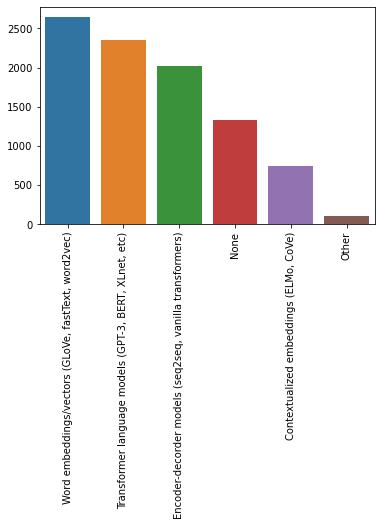

In [26]:
sel_cols = [x for x in raw_data.columns if 'Which of the following natural language processing (NLP) methods do you use on a regular basis?' in x]
val_cnts = raw_data.shape[0] - pd.isnull(raw_data[sel_cols]).sum().sort_values()
sns.barplot(x = [x.split('Selected Choice - ')[-1] for x in val_cnts.index], y = val_cnts)
plt.xticks(rotation = 90)
plt.show()